Work with the deepstack face API. 

In [1]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IP = 'localhost'
PORT = '80'
API_KEY = ""
TIMEOUT = 20 # Default is 10

## Face API
Run with: 
```
docker run -e VISION-FACE=True -v localstorage:/datastore -p 80:5000 \
deepquestai/deepstack:latest
```

In [8]:
dsface = ds.DeepstackFace(IP, PORT, API_KEY, TIMEOUT)

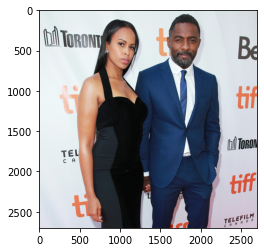

In [9]:
image_path = 'tests/images/couple.jpg'

plt.imshow(Image.open(image_path));

## Face detection
Detect faces, but do not recognise them, quite fast.

In [10]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = dsface.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 8.59 ms, sys: 4.61 ms, total: 13.2 ms
Wall time: 257 ms


In [11]:
predictions

[{'confidence': 0.877187,
  'y_min': 166,
  'x_min': 1622,
  'y_max': 685,
  'x_max': 1987},
 {'confidence': 0.8815226,
  'y_min': 236,
  'x_min': 868,
  'y_max': 731,
  'x_max': 1200}]

In [7]:
len(predictions)

2

## Register a face
Post a name and a close up photo of a face

In [12]:
%%time
try:
    with open('tests/images/idris.jpg', "rb") as image_bytes:
        response = dsface.register("idris", image_bytes)
        print(response)
except ds.DeepstackException as exc:
    print(exc)

face added
CPU times: user 1.61 ms, sys: 1.65 ms, total: 3.25 ms
Wall time: 201 ms


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [13]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = dsface.recognize(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 5.32 ms, sys: 990 µs, total: 6.31 ms
Wall time: 380 ms


In [10]:
predictions

[{'confidence': 0.58644783,
  'userid': 'idris',
  'y_min': 226,
  'x_min': 871,
  'y_max': 728,
  'x_max': 1204},
 {'confidence': 0.73343533,
  'userid': 'Idris Elba',
  'y_min': 163,
  'x_min': 1622,
  'y_max': 685,
  'x_max': 1988}]

## Face list 
Get a list of the registered faces in deepstack

In [19]:
dsface.get_registered_faces()

['idris']

## Helper functions
The package provides helper functions for extracting info out of deepstack predictions.

Get recognised faces and their probability (%)

In [11]:
ds.get_recognized_faces(predictions)

{'idris': 58.6, 'Idris Elba': 73.3}